# Preparando el modelo
Para poder entrenar el modelo predictivo, necesito que todas mis variables sean numéricas. Para eso voy a utilizar one-hot encoding y pasar mis variables categóricas a numéricas, con 1 y 0.
Pero antes que nada, voy a separar el dataset en el target (precio en dolares) Y, y las variables X.

In [102]:
#Importo los modulos necesarios.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV


In [103]:
df = pd.read_csv("Dataframe.csv")

In [104]:
X = df.drop(columns = ["Direccion","Dolares","Pesos","DolaresM2","PesosM2","Cotizacion","Trimestre","Comunas"])
Y = df["Dolares"].to_numpy()
print(X.shape,Y.shape)

(132017, 3) (132017,)


In [105]:
X_one_hot = pd.get_dummies(X,columns=["Barrio"])
X_one_hot.shape

(132017, 54)

In [74]:
transform = StandardScaler()
X_one_hot = transform.fit_transform(X_one_hot)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_one_hot, Y, test_size = 0.3, random_state = 42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(92411, 54) (92411,)
(39606, 54) (39606,)


## Acercamiento con Ridge Regression

In [72]:
RR = Ridge()
params =  {'alpha': [100,10,1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
RR_grid = GridSearchCV(RR, params, scoring='neg_mean_squared_error',cv=5)
RR_grid.fit(x_train,y_train)
RR_grid.best_params_



c:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.97973e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 10, 'fit_intercept': True, 'solver': 'sag'}

In [77]:
tuned_ridge = Ridge(alpha = 10, fit_intercept = True, solver = "sag")
tuned_ridge.fit(x_train,y_train)

Ridge(alpha=10, solver='sag')

In [84]:
cv_score_ridge = cross_val_score(tuned_ridge,x_train,y_train,cv = 10)
print(cv_score_ridge)
print("AVG:",cv_score_ridge.mean())

[0.63919032 0.64716743 0.63339794 0.6368729  0.64378529 0.63433027
 0.6300566  0.63178321 0.62965749 0.64608886]
AVG: 0.6372330322559643


In [83]:
yhat_ridge = tuned_ridge.predict(x_test)
print("MSE: ",mean_squared_error(y_test, yhat_ridge),"\nRMSE:",root_mean_squared_error(y_test,yhat_ridge))

MSE:  1344358664.8985097 
RMSE: 36665.496926927226


## Acercamiento con DecisionTreeRegressor

In [79]:
regressor = DecisionTreeRegressor(random_state=0)
cv_score_tree = cross_val_score(regressor,x_train,y_train, cv= 10)

In [85]:
print("AVG Score:",cv_score_tree.mean())

AVG Score: 0.7454054933934188


In [17]:
regressor.fit(x_train,y_train)
yhat = regressor.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
print("MSE: ",mean_squared_error(y_test, yhat),"\nRMSE:",root_mean_squared_error(y_test,yhat))

MSE:  902057259.510523 
RMSE: 30034.268086812488


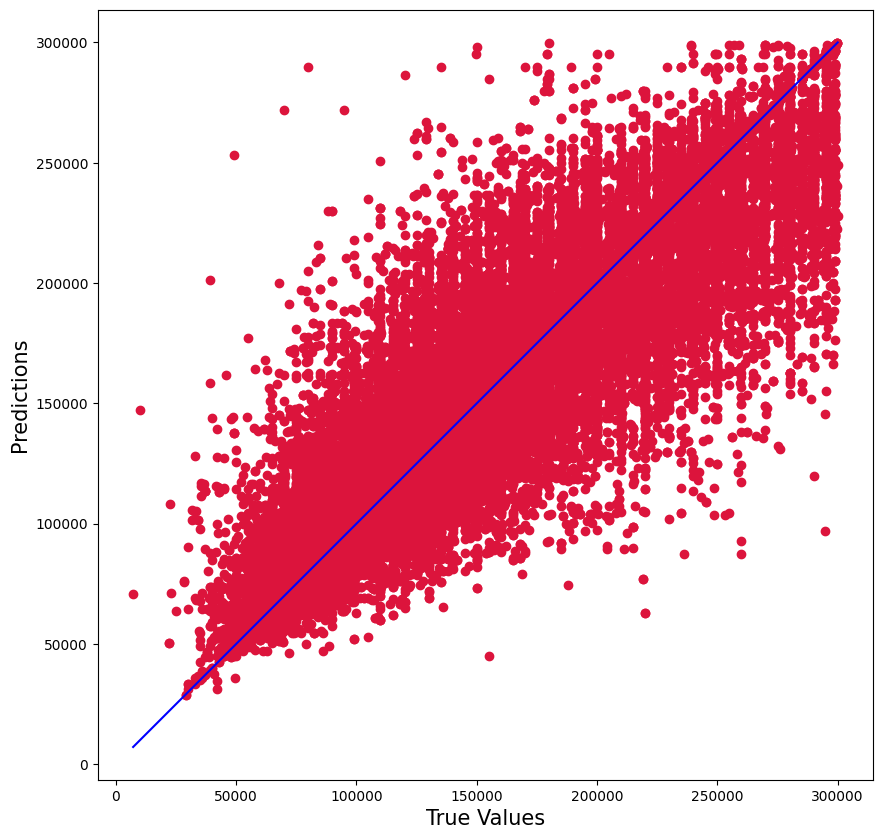

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, yhat, c='crimson')


p1 = max(max(y_test), max(yhat))
p2 = min(min(y_test), min(yhat))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [64]:
regressor.score(x_test,y_test)

0.7542466935430993

## Regression Tree vs Ridge

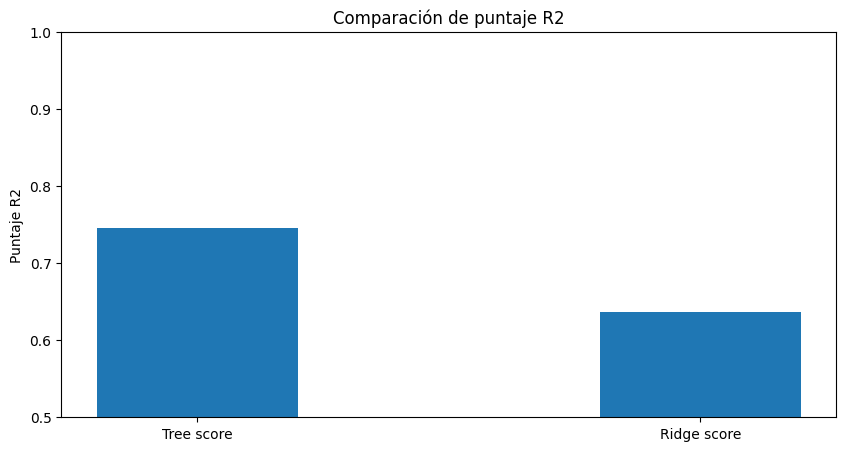

In [101]:
data = {"Tree score":cv_score_tree.mean(),"Ridge score":cv_score_ridge.mean()}
x = list(data.keys())
y = list(data.values())

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, width = 0.4)
plt.ylim(0.5,1)
plt.ylabel("Puntaje R2")
plt.title("Comparación de puntaje R2")
plt.show()
 


## ¿Y si el modelo es entrenado por barrio?

In [46]:
df["Barrio"].value_counts()

Barrio
PALERMO               15647
CABALLITO              9567
ALMAGRO                8008
BELGRANO               7828
BALVANERA              7548
RECOLETA               7380
VILLA CRESPO           6485
VILLA URQUIZA          5646
FLORES NORTE           5454
SAAVEDRA               3369
COLEGIALES             3283
SAN NICOLAS            3134
MONTSERRAT             2637
LINIERS                2597
PARQUE CHACABUCO       2565
CONSTITUCION           2439
SAN CRISTOBAL          2277
NU?æEZ                 1991
BARRACAS ESTE          1913
VILLA DEL PARQUE       1861
VILLA LURO             1772
RETIRO                 1747
SAN TELMO              1677
CHACARITA              1605
MONTE CASTRO           1602
BOEDO                  1555
NUÑEZ                  1373
FLORESTA               1344
VILLA SANTA RITA       1323
VELEZ SARSFIELD        1291
VILLA DEVOTO NORTE     1288
VILLA GRAL. MITRE      1268
COGHLAN                1262
VILLA PUEYRREDON       1225
VILLA ORTUZAR          1222
MATADEROS    

In [55]:
X_palermo = df.drop(columns = ["Direccion","Dolares","Pesos","DolaresM2","PesosM2","Cotizacion","Trimestre","Comunas"])
X_palermo = X[X["Barrio"] == "PALERMO"]
X_palermo.drop(columns=["Barrio"],inplace=True)
X_palermo

C:\Users\migue\AppData\Local\Temp\ipykernel_1052\1744741127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_palermo.drop(columns=["Barrio"],inplace=True)


,PropiedadS,Ambientes
2284,14,1
2285,21,1
2286,17,1
2287,18,1
2288,20,1
...,...,...
130703,39,2
130704,30,1
130705,29,1
130706,38,2


In [57]:
Y_palermo = df[df["Barrio"] == "PALERMO"]
Y_palermo = Y_palermo["Dolares"].to_numpy()
Y_palermo

array([110000,  75000,  78000, ...,  93000,  95000, 150000], dtype=int64)

In [58]:
scaler = StandardScaler()
X_palermo = scaler.fit_transform(X_palermo)
x_train_palermo,x_test_palermo,y_train_palermo,_y_test_palermo = train_test_split(X_palermo,Y_palermo,test_size=0.4,random_state=41)
print(x_train_palermo.shape,y_train_palermo.shape)
print(x_test_palermo.shape,_y_test_palermo.shape)

(9388, 2) (9388,)
(6259, 2) (6259,)


In [59]:
reg_palermo = DecisionTreeRegressor(random_state=0) 
reg_palermo.fit(x_train_palermo,y_train_palermo)
yhat_palermo = reg_palermo.predict(x_test_palermo)
print("MSE: ",mean_squared_error(_y_test_palermo, yhat_palermo),"\nRMSE:",root_mean_squared_error(_y_test_palermo,yhat_palermo))

MSE:  1049198398.8226607 
RMSE: 32391.332155727414


In [63]:
reg_palermo.score(x_test_palermo,_y_test_palermo)

0.6968119592993004

Este camino no llevó a mejores resultados.